In [1]:
import sys
sys.path.insert(0, '..')
import pandas as pd
from matplotlib import pyplot as plt
from scipy.special import expit
import numpy as np
from covid19.core import model, transform, io
from covid19 import draw
from covid19.draw import sir, history
from copy import deepcopy

# Read

In [2]:
path = '../data/CSSEGISandData/'
df = io.read_covid(path)

In [3]:
path = '../data/population.csv'
population = io.read_population(path)

In [4]:
df = pd.merge(df, population, how='left', on='Country/Region')

# Additionals functions

In [5]:
transform.get_provinces(df).head()

,Province/State,Country/Region
5,British Columbia,Canada
6,New South Wales,Australia
7,Victoria,Australia
8,Queensland,Australia
19,South Australia,Australia


In [6]:
transform.get_countries(df).head()

,Country/Region
0,Thailand
1,Japan
2,Singapore
3,Nepal
4,Malaysia


In [7]:
transform.get_history(df).head()

Type,Confirmed,Deaths,Recovered,Population
1/22,555,17,28,6.959777e+09
1/23,653,18,30,6.959777e+09
1/24,941,26,36,6.959777e+09
1/25,1434,42,39,6.959777e+09
1/26,2118,56,52,6.959777e+09


In [8]:
transform.get_history(df, country='Finland').head()

Type,Confirmed,Deaths,Recovered,Population
1/22,0,0,0,5495096.0
1/23,0,0,0,5495096.0
1/24,0,0,0,5495096.0
1/25,0,0,0,5495096.0
1/26,0,0,0,5495096.0


In [9]:
transform.get_history(df, country='China', province='Hubei').head()

Type,Confirmed,Deaths,Recovered,Population
1/22,444,17,28,NaN
1/23,444,17,28,NaN
1/24,549,24,31,NaN
1/25,761,40,32,NaN
1/26,1058,52,42,NaN


# History of desease

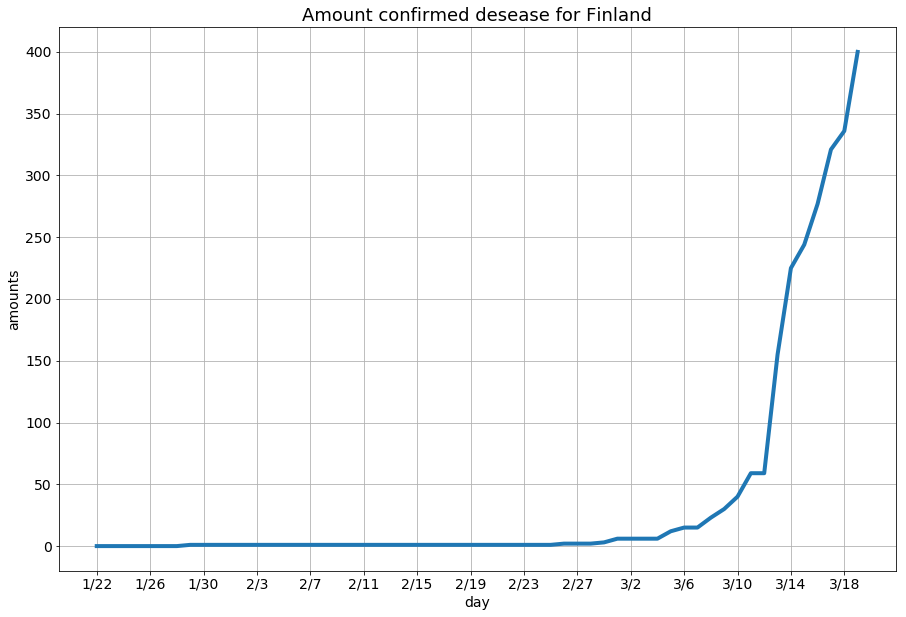

In [10]:
country = 'Finland'
province = None
history.plot_history(df, country=country, province=province)

# Contagiosus

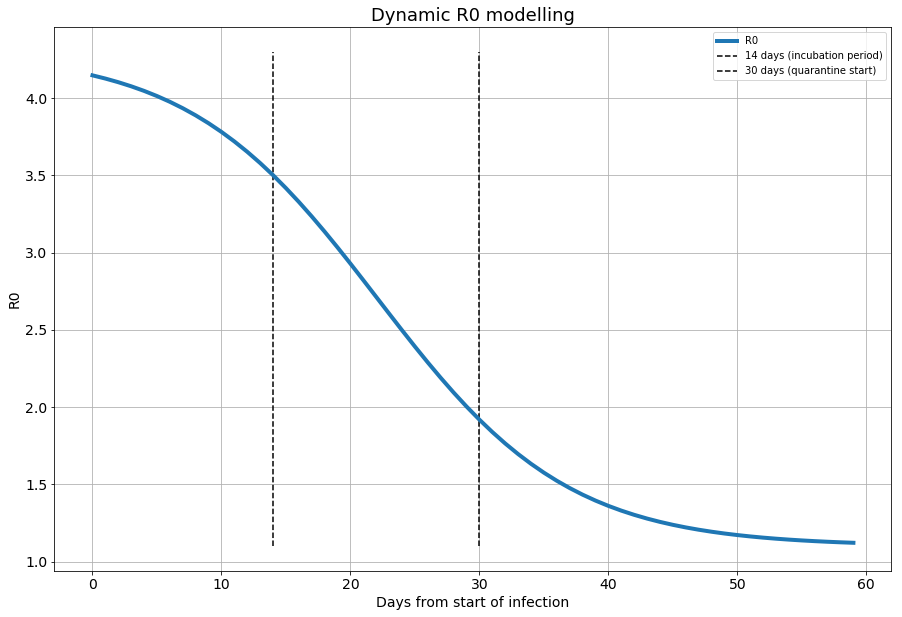

In [11]:
max_R0 = 4.3
min_R0 = 1.1

dynamic_R0 = expit(np.linspace(-5, 3, num=60))[::-1]
dynamic_R0 = dynamic_R0 * (max_R0 - min_R0) + min_R0
dynamic_R0 = np.concatenate((dynamic_R0, np.repeat(dynamic_R0[-1], 400-len(dynamic_R0))))

title = 'Dynamic R0 modelling'
y_label = 'R0'
x_label = 'Days from start of infection'
draw.plot(y=dynamic_R0[:60], title=title, y_label=y_label, x_label=x_label, ticks=(None, 1))
plt.vlines(14, min_R0, max_R0, label='14 days (incubation period)', linestyles='dashed')
plt.vlines(30, min_R0, max_R0, label='30 days (quarantine start)', linestyles='dashed')
plt.legend(['R0', '14 days (incubation period)', '30 days (quarantine start)'])

del dynamic_R0

# Epidemic modeling with SIR

### Contagiosus

In [12]:
max_R0 = 4.3
min_R0 = 1.1

dynamic_R0 = expit(np.linspace(-5, 3, num=60))[::-1]
dynamic_R0 = dynamic_R0 * (max_R0 - min_R0) + min_R0
dynamic_R0 = np.concatenate((dynamic_R0, np.repeat(dynamic_R0[-1], 400-len(dynamic_R0))))

### Config

In [13]:
base_config = {
    'df': df,
    'days': 150,  # predicted_days
    'start_day': 0,
    'beta': dynamic_R0 * 0.0576 * 2,
    'gamma': 0.0576 * 2,  # recovered_per_day
}

### Russia

In [14]:
config = deepcopy(base_config)
config['country'] = 'Russia'
config['start_day'] = 45
S, I, R = model.sir_modeling(**config)

Type,Confirmed,Deaths,Recovered,Population
1/22,0,0,0,144342396.0
1/23,0,0,0,144342396.0
1/24,0,0,0,144342396.0
1/25,0,0,0,144342396.0
1/26,0,0,0,144342396.0


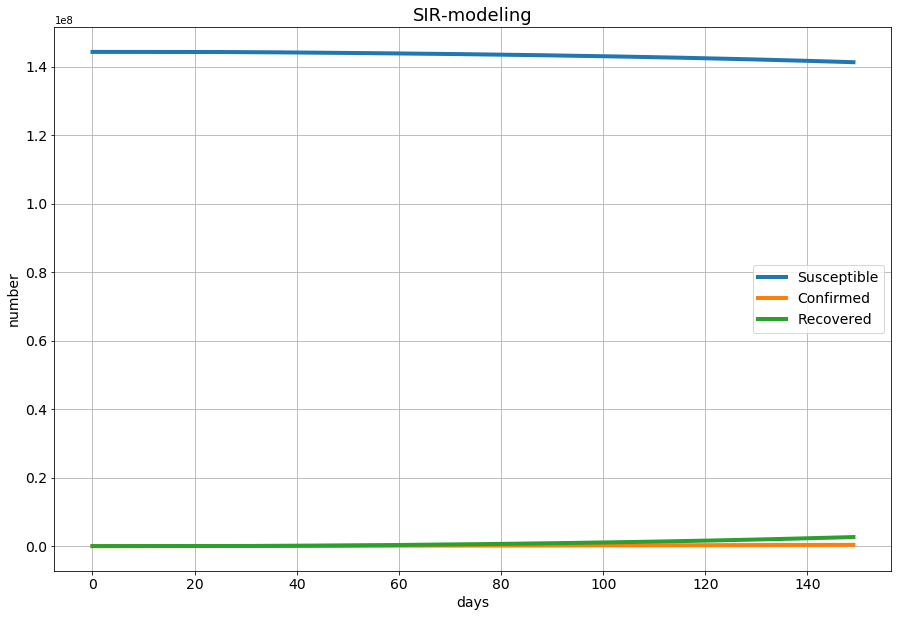

In [15]:
y_label = 'number'
x_label = 'days'
title = 'SIR-modeling'
legend = ['Susceptible', 'Confirmed', 'Recovered']
draw.plot(y=S)
draw.plot(y=I, figsize=None)
draw.plot(y=R, figsize=None, y_label=y_label, title=title, x_label=x_label, legend=legend)
transform.get_history(df, country=config['country']).head()

### Finland

In [16]:
config = deepcopy(base_config)
config['country'] = 'Finland'
config['start_day'] = 45
S, I, R = model.sir_modeling(**config)

Type,Confirmed,Deaths,Recovered,Population
1/22,0,0,0,5495096.0
1/23,0,0,0,5495096.0
1/24,0,0,0,5495096.0
1/25,0,0,0,5495096.0
1/26,0,0,0,5495096.0


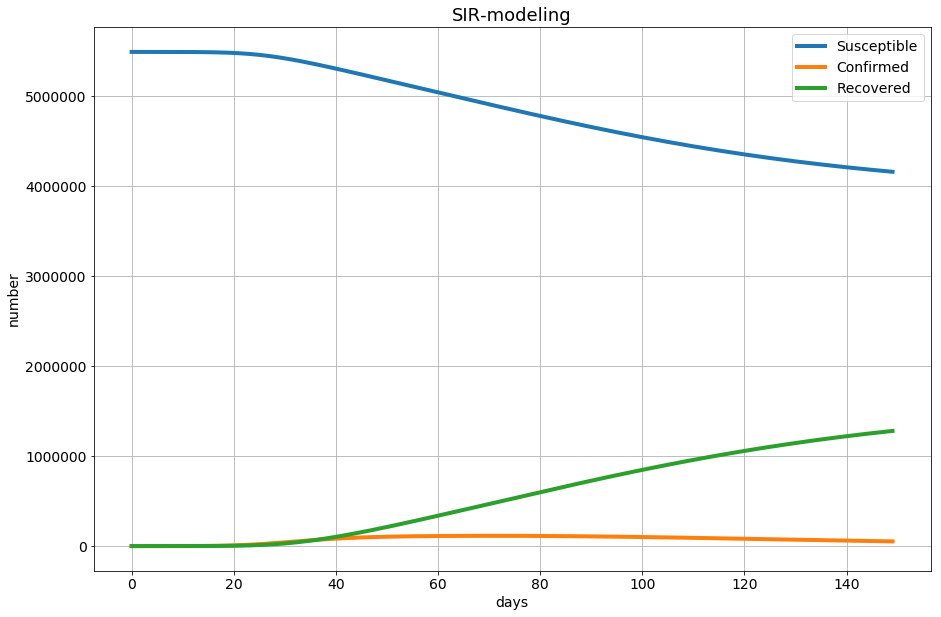

In [17]:
y_label = 'number'
x_label = 'days'
title = 'SIR-modeling'
legend = ['Susceptible', 'Confirmed', 'Recovered']
draw.plot(y=S)
draw.plot(y=I, figsize=None)
draw.plot(y=R, figsize=None, y_label=y_label, title=title, x_label=x_label, legend=legend)
transform.get_history(df, country=config['country']).head()